# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.507527e+01     1.382503e+01
 * time: 0.0017590522766113281
     1     3.148141e+01     7.810955e+00
 * time: 0.006194114685058594
     2     2.548565e+01     3.177858e+00
 * time: 0.011851072311401367
     3     2.174095e+01     2.236158e+00
 * time: 0.01709294319152832
     4     2.034389e+01     2.068158e+00
 * time: 0.02236795425415039
     5     1.952420e+01     1.333026e+00
 * time: 0.027699947357177734
     6     1.900514e+01     1.192628e+00
 * time: 0.03220105171203613
     7     1.864762e+01     1.109804e+00
 * time: 0.036657094955444336
     8     1.835239e+01     7.930221e-01
 * time: 0.0410151481628418
     9     1.803382e+01     8.360037e-01
 * time: 0.04549813270568848
    10     1.801482e+01     1.725986e+00
 * time: 0.04900813102722168
    11     1.786884e+01     1.016513e+00
 * time: 0.05330705642700195
    12     1.769638e+01     7.709609e-01
 * time: 0.057760000228881836
    13     1.758212e+01     6.740139e-01
 *

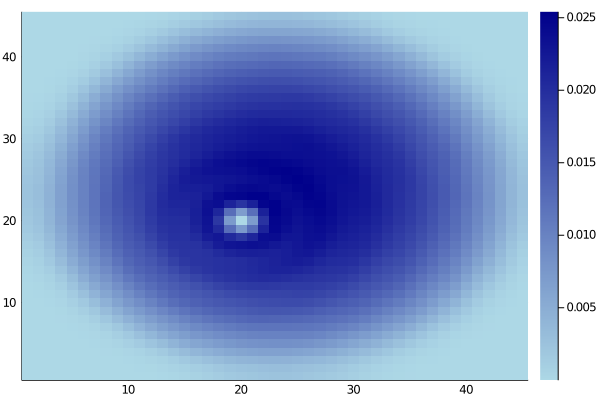

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)